In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from envs.mimic import MIMICEnv
from stable_baselines3 import PPO
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy

from dddqn import DDDQN_Agent

In [2]:
env = gym.make('mimic-v0')


def eval_policy(model, env, verbose=True):

    returns, lengths = evaluate_policy(model, env, n_eval_episodes=20, return_episode_rewards=True)

    if verbose:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.set_title('return / episode')
        ax1.plot(returns)
        ax2.set_title('episode length')
        ax2.plot(lengths)

        plt.show()

    return np.mean(returns), np.mean(lengths)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.8     |
|    ep_rew_mean     | 10.2     |
| time/              |          |
|    fps             | 2588     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------


/Users/jakeweiss/miniconda3/envs/py39/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


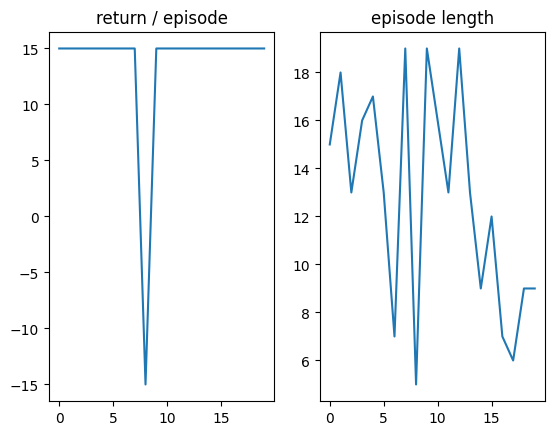

In [3]:
### Proximal Policy Optimization ###

ppo_model = PPO('MlpPolicy', env, verbose=1).learn(total_timesteps=2000)
#ppo_model.save('models/mimic_ppo')

#ppo_model = PPO.load('models/mimic_ppo')

ppo_return, ppo_len = eval_policy(ppo_model, env)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.458    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3345     |
|    time_elapsed     | 0        |
|    total_timesteps  | 57       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 3.75     |
|    exploration_rate | 0.155    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3390     |
|    time_elapsed     | 0        |
|    total_timesteps  | 89       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 7.5    

/Users/jakeweiss/miniconda3/envs/py39/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


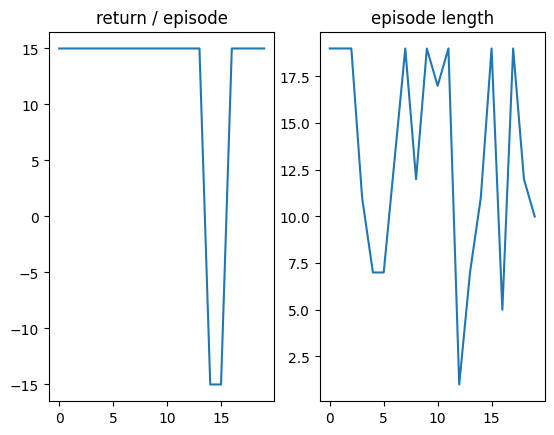

In [4]:
### Deep Q Networks ###

dqn_model = DQN('MlpPolicy', env, verbose=1).learn(total_timesteps=1000)
#dqn_model.save('models/mimic_dqn')

#dqn_model = DQN.load('models/mimic_dqn')

dqn_return, dqn_len = eval_policy(dqn_model, env)

In [ ]:
### Dueling Double Deep Q Networks)

dddqn_agent = DDDQN_Agent(env.obs_dim, env.action_dim, )